In [557]:
'''Problem Statement

The data contains the selling prices of different houses based on different characteristics/attributes like area, no. of rooms, no. of bathrooms, etc.
At times, the property dealers appreciate the prices based on the demand and hence there is rise in prices in real estate. So, in order to cope with this problem
so that it is beneficial for the customers,we must have a model in place which should tell us the ideal prices of the house based on its characteristics.

The objective of the study is to predict the ideal prices of the houses based on their characteristics using a regression algorithm.'''

'Problem Statement\n\nThe data contains the selling prices of different houses based on different characteristics/attributes like area, no. of rooms, no. of bathrooms, etc.\nAt times, the property dealers appreciate the prices based on the demand and hence there is rise in prices in real estate. So, in order to cope with this problem\nso that it is beneficial for the customers,we must have a model in place which should tell us the ideal prices of the house based on its characteristics.\n\nThe objective of the study is to predict the ideal prices of the houses based on their characteristics using a regression algorithm.'

In [556]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
########## importing data

In [360]:
hp=pd.read_csv("F:/jupyter notebook/hp.csv")

In [361]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [362]:
#hp.describe()

,ID,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
count,2.161300e+04,2.160900e+04,21613.000000,21609.000000,21604.000000,2.160400e+04,21613.000000,21613.000000,21610.000000,21613.000000,21613.000000,21613.000000,21612.000000,21612.000000,21612.000000,21612.000000,21613.000000
mean,4.580302e+09,5.401984e+05,3.370842,2.114732,2079.931772,1.510776e+04,1.494309,7.623467,1788.344193,291.509045,46.994864,84.402258,98077.937766,47.560048,-122.213892,1986.538914,12768.455652
std,2.876566e+09,3.673890e+05,0.930062,0.770138,918.487597,4.142827e+04,0.539989,1.105439,827.982604,442.575043,29.373411,401.679240,53.505425,0.138565,0.140830,685.404255,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,1.000000,290.000000,0.000000,3.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1429.250000,5.040000e+03,1.000000,7.000000,1190.000000,0.000000,21.000000,0.000000,98033.000000,47.470975,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.617500e+03,1.500000,7.000000,1560.000000,0.000000,43.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068825e+04,2.000000,8.000000,2210.000000,560.000000,67.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,10.000000,9410.000000,4820.000000,118.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


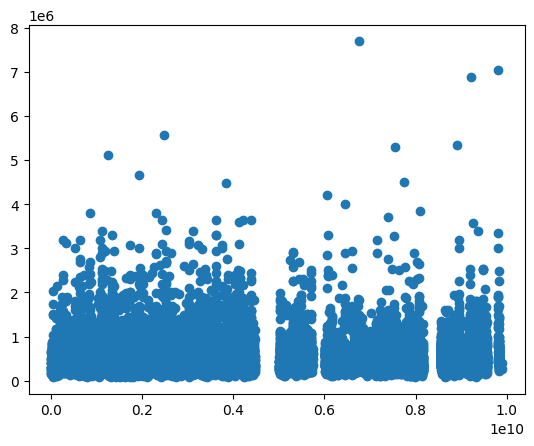

In [363]:
plt.scatter(x=hp['ID'],y=hp['Sale Price'])

<Axes: xlabel='Sale Price'>

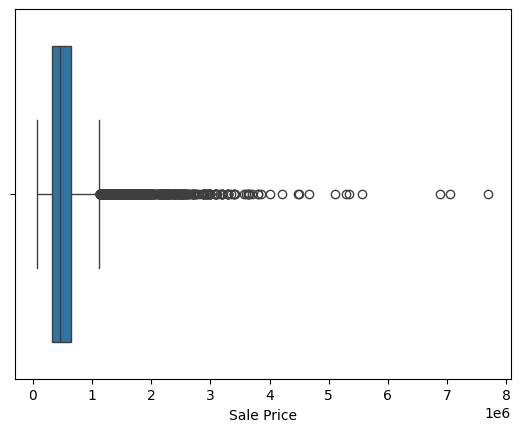

In [364]:
import seaborn as sns
sns.boxplot(x=hp['Sale Price'])

In [365]:
lim=hp.describe()
sales25=lim.iloc[4,1]
sales75=lim.iloc[6,1]
iqr=sales75-sales25

# or sales25 = data['Sale Price'].quantile(0.25)
# sales75 = data['Sale Price'].quantile(0.75)

In [366]:
#imputing missing value in sales column(target var)
ll=sales25-1.5*iqr
ul=sales75+1.5*iqr

In [367]:
def limit(value):
    if value>ul:
        return ul
    elif value<ll:
        return ll
    else:
        return value
hp['Sale Price']=hp['Sale Price'].apply(limit)

In [368]:
#droping the row for treating missing value in target variable
hp.dropna(inplace=True,axis=0,subset=['Sale Price'])

In [369]:
#teating missing value in response var
#numerical_continuous
float_columns=['Flat Area (in Sqft)','Longitude','Latitude','No of Bathrooms','Lot Area (in Sqft)','Area of the House from Basement (in Sqft)','Living Area after Renovation (in Sqft)']
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(missing_values=np.nan,strategy='median')
hp[float_columns]=imputer1.fit_transform(hp[float_columns])

In [370]:
#zipcode cant replace with median as decimal cant be in zipcode but can with mode 
#fit_transform expect 2d array __ .values.reshape(-1,1))
imputer2=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
hp['Zipcode']=imputer2.fit_transform(hp['Zipcode'].values.reshape(-1,1))

In [371]:
hp['Zipcode']=hp['Zipcode'].astype(object) #as zipcode not convey any meaningful information as numeric data

In [373]:
#wrongly recorded as catagorical | it is more meaningful in numerical
hp['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [374]:
dictionary1={np.nan:0, 'Thrice':3, 'Four':4, 'Twice':2, 'Once':1}
hp['No of Times Visited']=hp['No of Times Visited'].replace(dictionary1)

In [375]:
hp['No of Times Visited'].sample(n=10,random_state=1)

6527     0
9105     0
3059     0
14433    0
9266     0
19446    0
277      0
1238     0
5352     1
21540    3
Name: No of Times Visited, dtype: int64

In [ ]:
# feature transformation and generation

In [376]:
hp['Ever Renovated']=np.where(hp['Renovated Year']==0,'No','Yes')

In [377]:
hp['Purchase Year'] = pd.to_datetime(hp['Date House was Sold']).dt.year

In [378]:
hp['Years Since Renovation']=np.where(hp['Ever Renovated']=="Yes",abs(hp["Purchase Year"]-hp["Renovated Year"]),0)

In [379]:
hp.drop(columns=['Purchase Year', 'Date House was Sold', 'Renovated Year','ID'],inplace=True)

In [ ]:
#visualising catagorical

<Axes: xlabel='Condition of the House'>

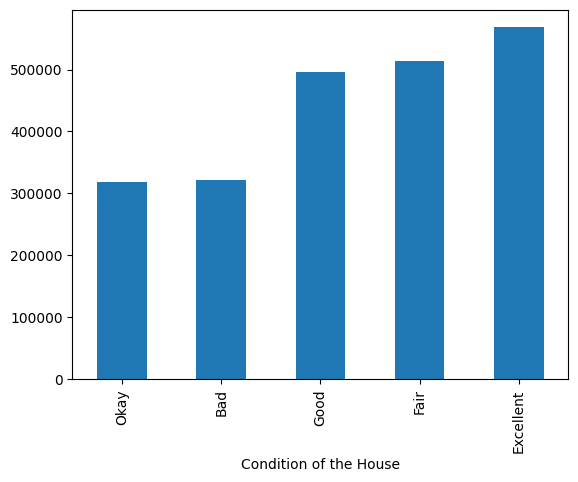

In [380]:
hp.groupby(['Condition of the House'])['Sale Price'].mean().sort_values(axis=0).plot(kind='bar')

In [382]:
#sparse binning + label encoding for this variable
mapping={'Excellent':3,'Fair':2,'Good':2,'Okay':1,'Bad':1}
hp['Condition of the House']=hp['Condition of the House'].map(mapping)

In [383]:
hp['Condition of the House'].value_counts()

Condition of the House
2    19706
3     1701
1      202
Name: count, dtype: int64

<Axes: xlabel='Ever Renovated'>

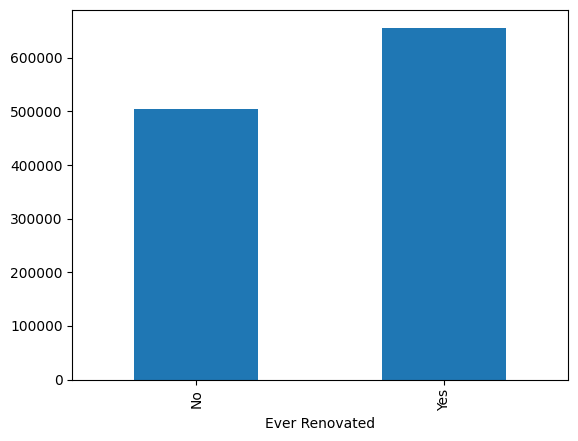

In [384]:
hp.groupby(['Ever Renovated'])['Sale Price'].mean().sort_values(axis=0).plot(kind='bar')

<Axes: xlabel='Waterfront View'>

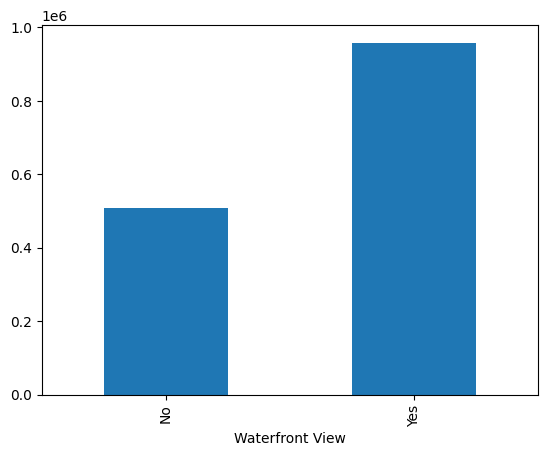

In [385]:
hp.groupby(['Waterfront View'])['Sale Price'].mean().sort_values(axis=0).plot(kind='bar')

<Axes: xlabel='Zipcode'>

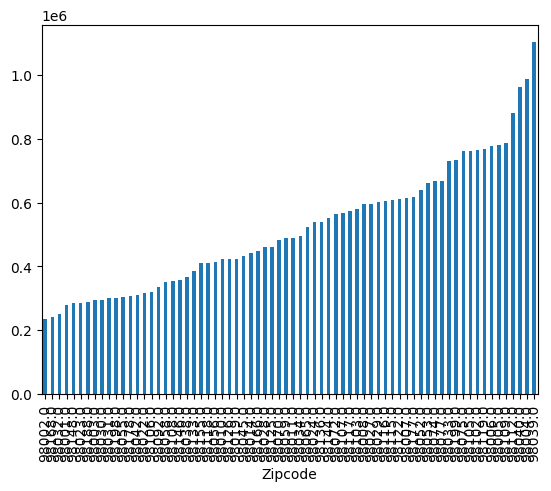

In [386]:
hp.groupby(['Zipcode'])['Sale Price'].mean().sort_values(axis=0).plot(kind='bar')

In [388]:
hp=hp.rename(columns={'Sale Price':'Sale_Price','Ever Renovated':'Ever_Renovated','Waterfront View':'Waterfront_View'})

In [ ]:
# checking catagorical var have impact or not using anova 

In [389]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [390]:
mod=ols('Sale_Price~Ever_Renovated',data=hp).fit()
anova_table=sm.stats.anova_lm(mod,typ=2)
print(anova_table)

'''simillarly,
mod=ols('Sale_Price~Waterfront_View',data=hp).fit()
anova_table=sm.stats.anova_lm(mod,typ=2)'''

                      sum_sq       df           F        PR(>F)
Ever_Renovated  1.998463e+13      1.0  324.378469  5.419055e-72
Residual        1.331185e+15  21607.0         NaN           NaN


"simillarly do to\nmod=ols('Sale_Price~Waterfront_View',data=hp).fit()\nanova_table=sm.stats.anova_lm(mod,typ=2)"

In [558]:
print("rejecting null i.e. have impact")

rejecting null i.e. have impact


In [ ]:
#creating dummy

In [393]:
hp=pd.get_dummies(hp,columns=['Ever_Renovated','Waterfront_View'],drop_first=True)

In [394]:
#binning catagorical var 'zipcode'

In [395]:
Zip_code=hp.groupby('Zipcode').agg({'Sale_Price':'mean'}).sort_values(by=['Sale_Price'])
print(Zip_code)

           Sale_Price
Zipcode              
98002.0  2.342840e+05
98168.0  2.403284e+05
98032.0  2.512962e+05
98001.0  2.808047e+05
98148.0  2.849086e+05
...               ...
98109.0  7.876028e+05
98112.0  8.807990e+05
98040.0  9.621087e+05
98004.0  9.869679e+05
98039.0  1.102126e+06

[70 rows x 1 columns]


In [396]:
Zip_code['Zipcode_group']=pd.cut(Zip_code['Sale_Price'],bins=10,labels=['group0','group1','group2','group3','group4','group5','group6','group7','group8','group9'],include_lowest=True)

In [397]:
print(Zip_code)

           Sale_Price Zipcode_group
Zipcode                            
98002.0  2.342840e+05        group0
98168.0  2.403284e+05        group0
98032.0  2.512962e+05        group0
98001.0  2.808047e+05        group0
98148.0  2.849086e+05        group0
...               ...           ...
98109.0  7.876028e+05        group6
98112.0  8.807990e+05        group7
98040.0  9.621087e+05        group8
98004.0  9.869679e+05        group8
98039.0  1.102126e+06        group9

[70 rows x 2 columns]


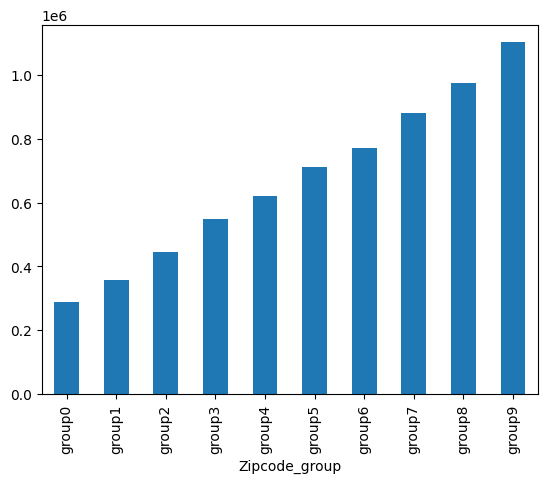

In [398]:
m=Zip_code.groupby(['Zipcode_group'])['Sale_Price'].mean().sort_values(axis=0).plot(kind='bar')

In [399]:
Zip_code=Zip_code.drop(columns="Sale_Price")

In [400]:
print(Zip_code)

        Zipcode_group
Zipcode              
98002.0        group0
98168.0        group0
98032.0        group0
98001.0        group0
98148.0        group0
...               ...
98109.0        group6
98112.0        group7
98040.0        group8
98004.0        group8
98039.0        group9

[70 rows x 1 columns]


In [402]:
hp=pd.merge(hp,Zip_code,left_on='Zipcode',how='left',right_index=True)

In [403]:
hp=hp.drop(columns='Zipcode')

In [404]:
hp=pd.get_dummies(hp,columns=['Zipcode_group'],drop_first=True)

In [ ]:
# converting bool to numerical

In [405]:
hp["Waterfront_View_Yes"] = hp["Waterfront_View_Yes"].astype('int64')
hp['Ever_Renovated_Yes'] = hp['Ever_Renovated_Yes'].astype('int64')
hp.iloc[:,19:28]=hp.iloc[:,19:28].astype('int64')

In [406]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale_Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   No of Times Visited                        21609 non-null  int64  
 7   Condition of the House                     21609 non-null  int64  
 8   Overall Grade                              21609 non-null  int64  
 9   Area of the House from Basement (in Sqft)  21609 non-null  float64
 10  Basement Area (in Sqft)    

In [407]:
hp.to_csv( "F:/transformed_houseprice.csv",sep = ',',index=False)
#exporting not necessary step--

In [ ]:
# separating independent variable from target variable 'Sale_Price'

In [507]:
X = data.drop(columns=['Sale_Price'])

In [509]:
#checking distribution of independent numerical variables
def distribution(data ,var):
  plt.figure(figsize = (len(var)*6,6), dpi = 120)
  for j,i in enumerate(var): 
    plt.subplot(1,len(var),j+1)
    plt.hist(data[i])
    plt.title(i)

In [510]:
numerical_columns = ['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','No of Times Visited','Condition of the House','Overall Grade','Area of the House from Basement (in Sqft)','Basement Area (in Sqft)','Age of House (in Years)','Latitude','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)','Years Since Renovation']

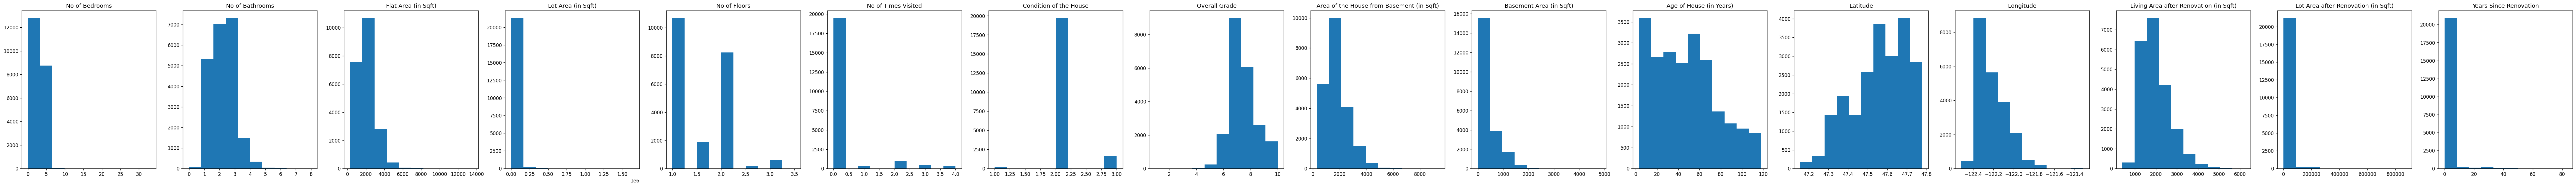

In [511]:
distribution(X, numerical_columns)

In [512]:
# skewness minimising
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms','No of Bathrooms','Flat Area (in Sqft)','Lot Area (in Sqft)','No of Floors','No of Times Visited','Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)','Age of House (in Years)','Longitude','Living Area after Renovation (in Sqft)','Lot Area after Renovation (in Sqft)','Years Since Renovation']

In [513]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

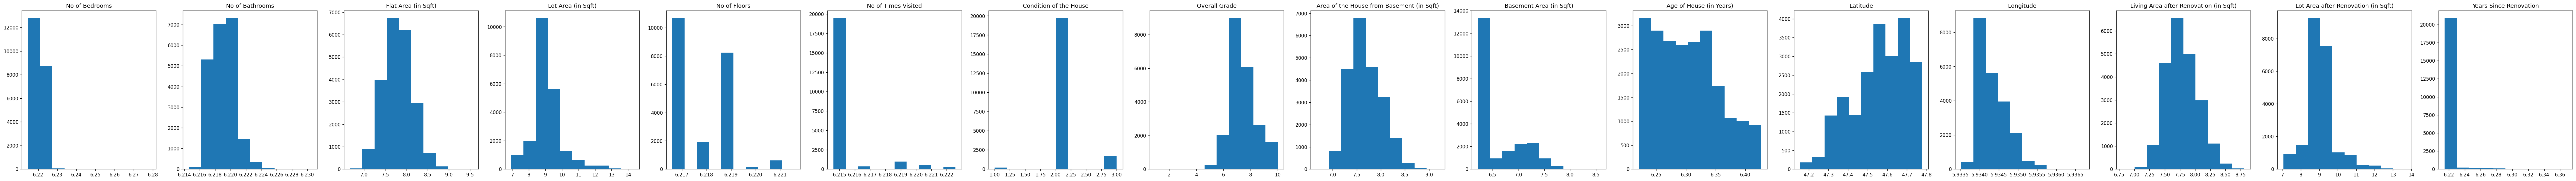

In [514]:
distribution(X, numerical_columns)

In [516]:
# scalling the data(standardisation)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y = data['Sale_Price']
X1 = scaler.fit_transform(X)
X = pd.DataFrame(X1, columns = X.columns)

In [518]:
#checking multi-collinearity i.e. correlation among independent var and 
# removing it using vif
k=X.corr()
k

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_group_group1,Zipcode_group_group2,Zipcode_group_group3,Zipcode_group_group4,Zipcode_group_group5,Zipcode_group_group6,Zipcode_group_group7,Zipcode_group_group8,Zipcode_group_group9
No of Bedrooms,1.000000,0.516645,0.617127,0.175425,0.175995,0.079664,0.046913,0.349933,0.509475,0.276781,...,-0.006617,-0.010565,-0.039396,-0.074396,0.024514,0.019485,0.090274,0.016703,0.102859,0.035737
No of Bathrooms,0.516645,1.000000,0.764563,0.105010,0.500980,0.187661,-0.002248,0.635778,0.696041,0.254042,...,0.063683,-0.032762,-0.081490,-0.034477,0.084113,0.052795,0.123241,0.037718,0.109942,0.067747
Flat Area (in Sqft),0.617127,0.764563,1.000000,0.327803,0.368116,0.255803,0.015028,0.725275,0.867011,0.384857,...,0.084090,-0.049389,-0.065655,-0.083541,0.096179,0.073701,0.154605,0.048304,0.153226,0.071171
Lot Area (in Sqft),0.175425,0.105010,0.327803,1.000000,-0.218404,0.121694,-0.020290,0.165808,0.319715,0.056278,...,0.074316,0.024149,0.085244,-0.183542,-0.027075,0.046547,-0.011813,-0.078477,0.075148,0.037108
No of Floors,0.175995,0.500980,0.368116,-0.218404,1.000000,0.029487,-0.092185,0.461442,0.548408,-0.266598,...,0.023721,-0.003375,-0.067900,0.079146,0.071809,0.009219,0.069868,0.064986,-0.008630,0.005873
No of Times Visited,0.079664,0.187661,0.255803,0.121694,0.029487,1.000000,0.037406,0.223676,0.161104,0.249488,...,0.401515,-0.065030,0.004761,0.005913,0.003488,0.024835,0.068148,-0.012538,0.065364,0.012930
Condition of the House,0.046913,-0.002248,0.015028,-0.020290,-0.092185,0.037406,1.000000,-0.041292,-0.057234,0.130478,...,0.012406,-0.017464,0.009942,0.017348,-0.019278,0.014344,0.033440,0.026529,0.014115,-0.004902
Overall Grade,0.349933,0.635778,0.725275,0.165808,0.461442,0.223676,-0.041292,1.000000,0.723789,0.116078,...,0.070332,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.509475,0.696041,0.867011,0.319715,0.548408,0.161104,-0.057234,0.723789,1.000000,-0.111289,...,0.063294,-0.019673,-0.055546,-0.097772,0.092118,0.058634,0.125459,0.029945,0.127926,0.069765
Basement Area (in Sqft),0.276781,0.254042,0.384857,0.056278,-0.266598,0.249488,0.130478,0.116078,-0.111289,1.000000,...,0.063276,-0.071126,-0.032765,0.019481,0.017343,0.040560,0.084122,0.057062,0.081651,0.016459


In [521]:
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j] >abs(0.5))&(i!=j)]

In [525]:
print("these are hig total",len(z),"corelated pair of independent variable")

these are hig total 34 corelated pair of independent variable


In [526]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = X[:]
## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)

No of Bedrooms                                1.762123
No of Bathrooms                               3.418054
Flat Area (in Sqft)                          78.542746
Lot Area (in Sqft)                            6.883728
No of Floors                                  2.439636
No of Times Visited                           1.432654
Condition of the House                        1.084395
Overall Grade                                 3.100950
Area of the House from Basement (in Sqft)    68.812288
Basement Area (in Sqft)                      20.132468
Age of House (in Years)                       2.557094
Latitude                                      2.440609
Longitude                                     1.817954
Living Area after Renovation (in Sqft)        3.031491
Lot Area after Renovation (in Sqft)           6.622191
Years Since Renovation                        2.865095
Ever_Renovated_Yes                            2.977981
Waterfront_View_Yes                           1.211054
Zipcode_gr

In [531]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [532]:
VIF[VIF>5].count()

np.int64(5)

In [533]:
for i in range(5):
  vif_data = MC_remover(vif_data)
vif_data.head()

Flat Area (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Area of the House from Basement (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,No of Times Visited,Condition of the House,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,...,Waterfront_View_Yes,Zipcode_group_group1,Zipcode_group_group2,Zipcode_group_group3,Zipcode_group_group4,Zipcode_group_group5,Zipcode_group_group6,Zipcode_group_group7,Zipcode_group_group8,Zipcode_group_group9
0,-0.398647,-1.448931,-0.915604,-0.305891,-0.240418,-0.563993,-0.726332,0.569132,-0.352576,-0.306108,...,-0.087181,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398647,0.176496,0.937193,-0.305891,-0.240418,-0.563993,0.538457,0.702316,1.161645,-0.746519,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.477788,-1.448931,-0.915604,-0.305891,-0.240418,-1.468566,-0.726332,1.290243,1.283619,-0.135646,...,-0.087181,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.678352,1.149811,-0.915604,-0.305891,3.225353,-0.563993,1.504500,0.231988,-0.283288,-1.272266,...,-0.087181,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398647,-0.148266,-0.915604,-0.305891,-0.240418,0.340581,-0.726332,-0.531708,0.409587,1.199268,...,-0.087181,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [534]:
XX = vif_data[:]

In [535]:
#spliting the dataset into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(XX, Y, test_size = 0.3, random_state = 101)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15126, 24), (6483, 24), (15126,), (6483,))

In [538]:
#implementing regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [539]:
lr.coef_

array([  7944.07244604,  38191.95022775,  17385.12859537,  29477.23287852,
        12002.6867584 ,  81611.4806901 ,   6700.58719161,  39390.33663746,
        20950.67550125, -18880.16219774,  37490.6656921 ,  17485.85858311,
        -8120.99748267,  11737.21019788,  10971.49526553,  11365.5199733 ,
        33586.67802886,  61346.99532822,  78360.06740236,  49553.20785701,
        70905.54128311,  39131.60574021,  68269.40825724,  23556.76544158])

In [ ]:
#generating prediction

In [481]:
predictions = lr.predict(x_test)

In [540]:
lr.score(x_test, y_test) #this is adjusted r square value

0.8216094345004433

In [549]:
#finding residual and plotting it
residuals = predictions - y_test

residual_table = pd.DataFrame({'residuals':residuals,'predictions':predictions})
residual_table = residual_table.sort_values( by = 'predictions')

In [550]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

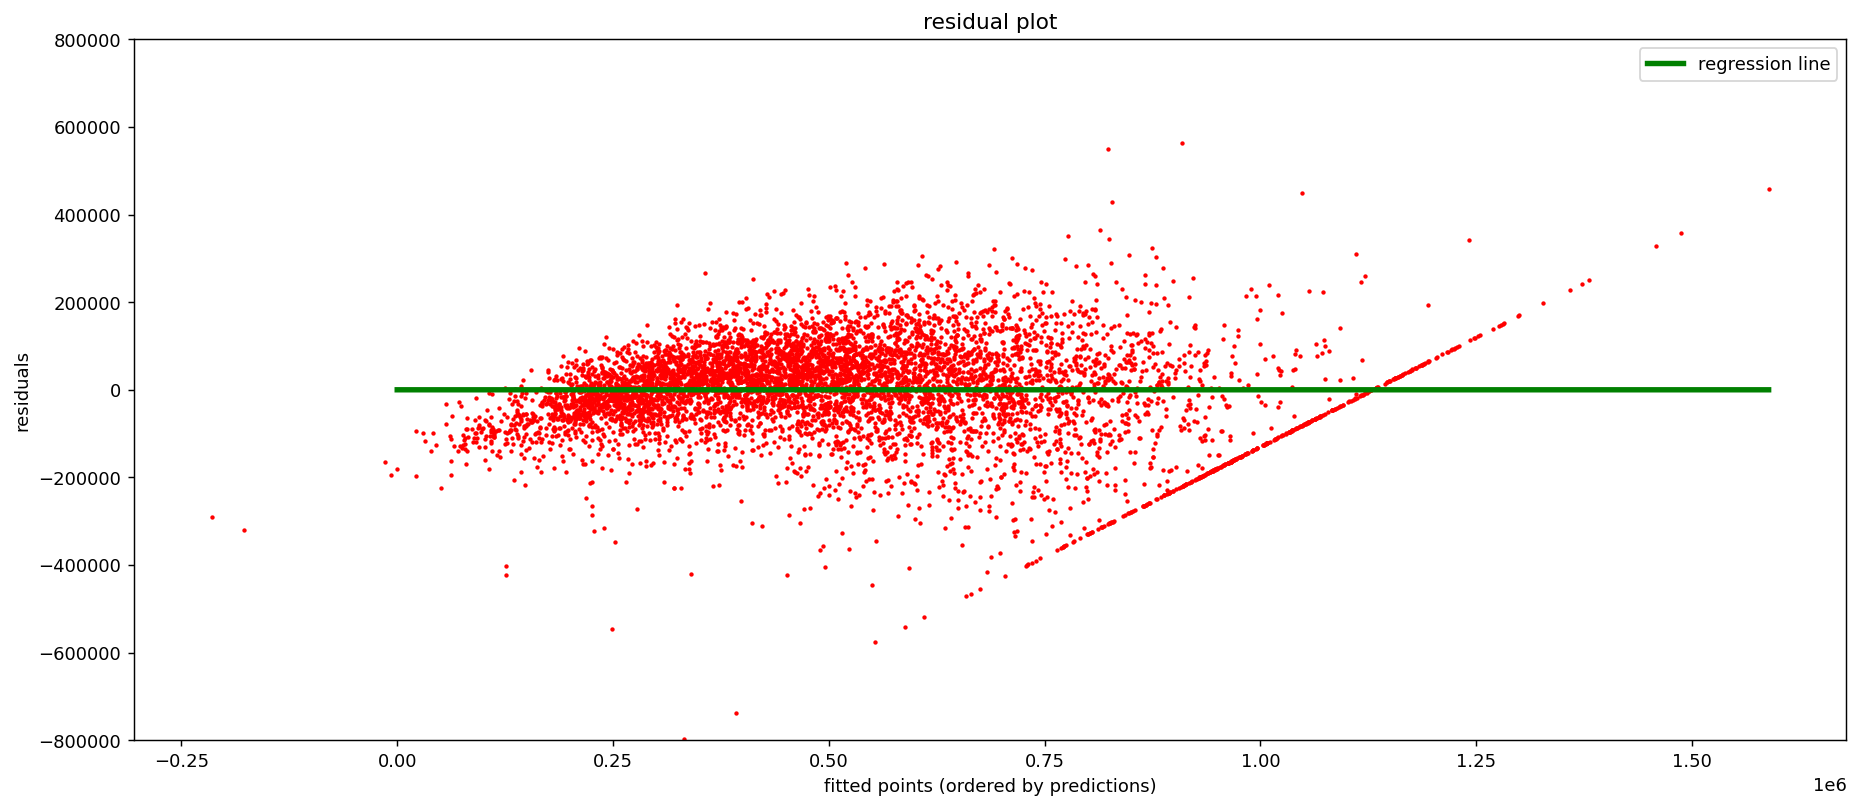

In [551]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

In [ ]:
#verifying assumption, some verified already

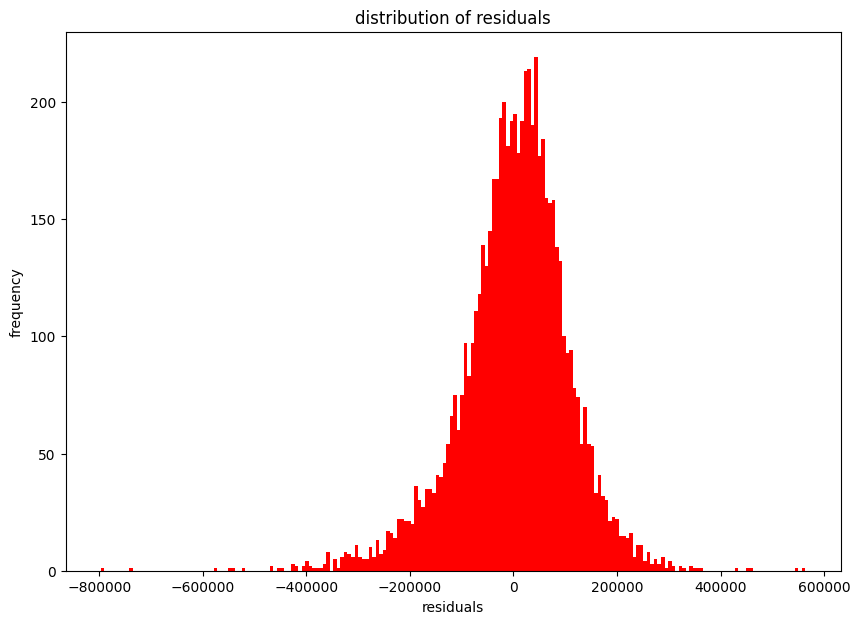

In [553]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

In [559]:
#interpreting model result

In [554]:
coefficients_table = pd.DataFrame({'column': x_train.columns,'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')

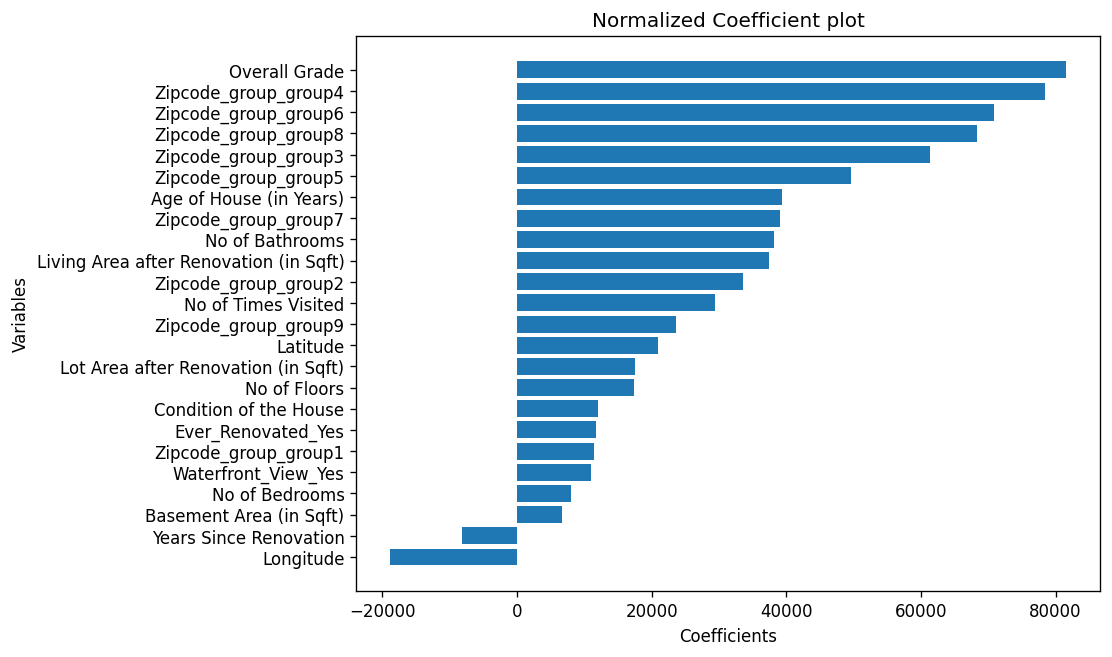

In [555]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()